# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


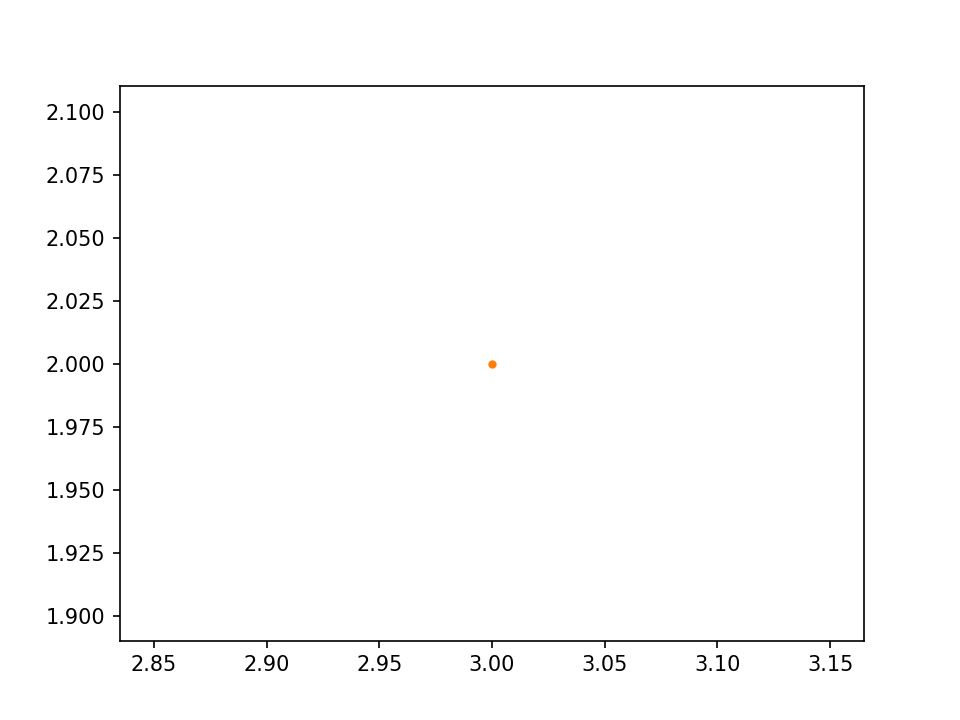

In [4]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

In [5]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer.

In [6]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [7]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


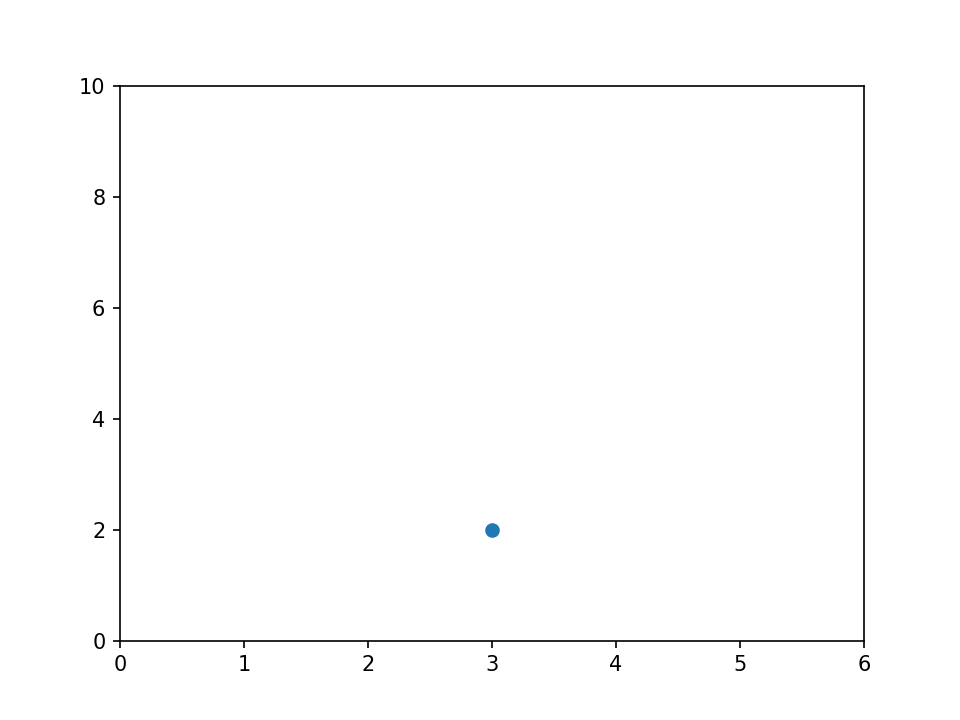

[0, 6, 0, 10]

In [8]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


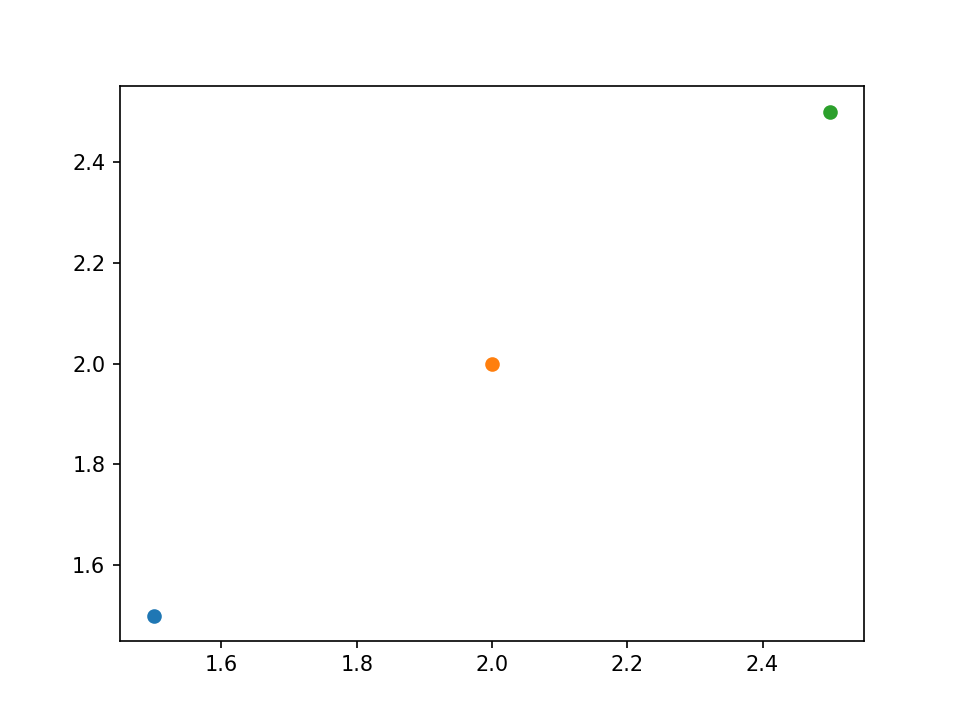

In [10]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

In [14]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()


# Scatterplots

<IPython.core.display.Javascript object>


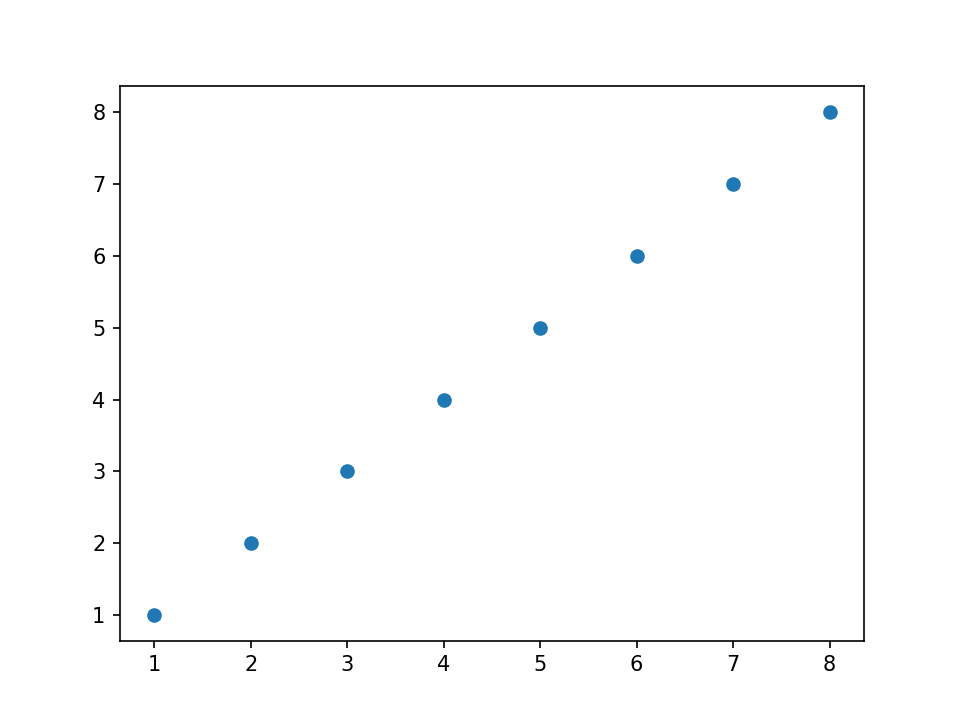

In [15]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


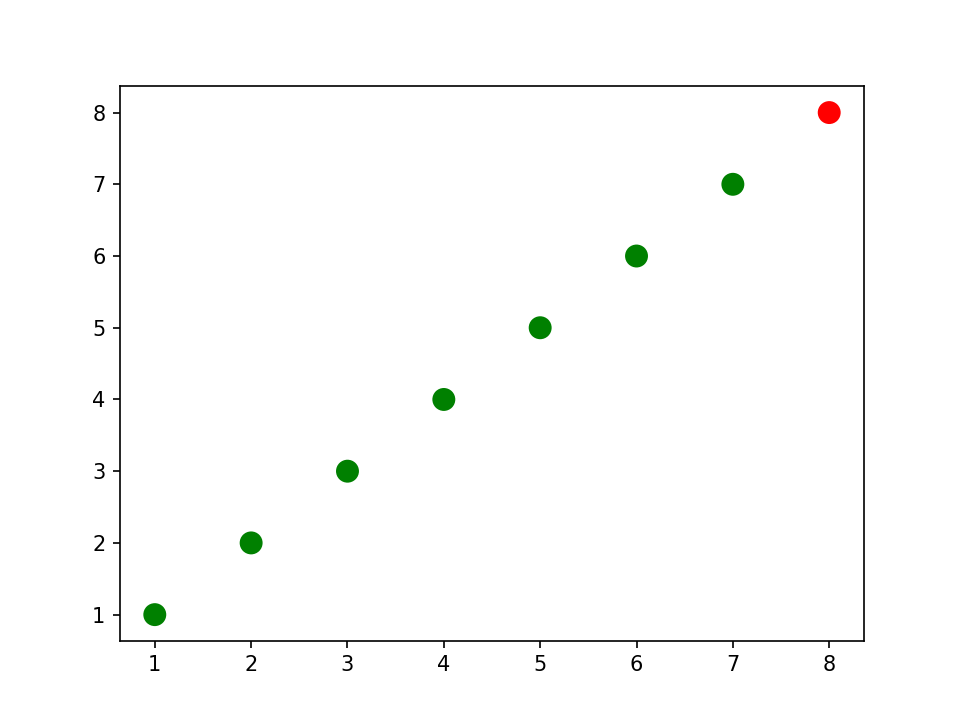

In [16]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [19]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [20]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


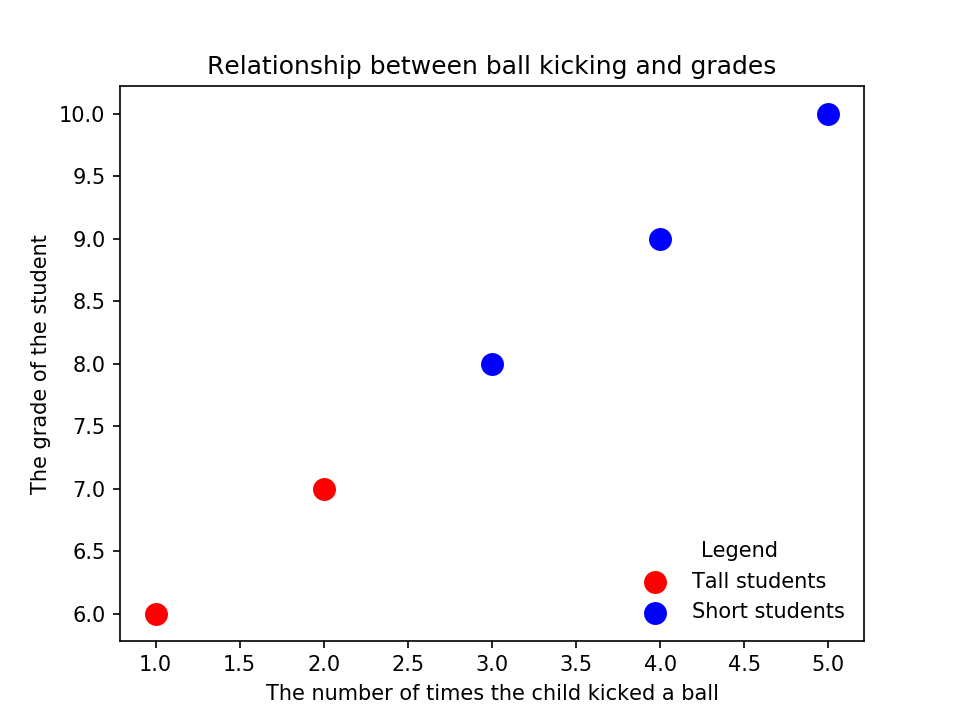

In [30]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [31]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')


In [32]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [33]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [25]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

In [26]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [27]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [28]:
# import the artist class from matplotlib
'''

First, we'll import the artist class from matplotlib. Then we'll make a recursive function which takes in an artist and some depth parameter. Then checks if the object is an artist and if so, prints out its string name. 
Then recurses and increases the depth for pretty printing. 
Finally, we can call this on the legend object itself. 
So you can see the legend artist is just made up of a number of different offsetboxes for drawing, as well as TextAreas and PathCollections. 

'''
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


In [34]:
'''
What I want you to take away from this is that there is nothing magical about what matplotlib is doing. Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file.

While you'll spend 95% of your time at the scripting layer, happily creating graphs and charts, it's important to understand how the library works underneath for the other 5% of the time. 

And the time that you will use this is when you really want to have control over and to create your own charting functions, and you'll have a chance to do that by the end of this course. 

'''

"\nWhat I want you to take away from this is that there is nothing magical about what matplotlib is doing. Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file.\n\nWhile you'll spend 95% of your time at the scripting layer, happily creating graphs and charts, it's important to understand how the library works underneath for the other 5% of the time. \n\nAnd the time that you will use this is when you really want to have control over and to create your own charting functions, and you'll have a chance to do that by the end of this course. \n\n"

# Line Plots

<IPython.core.display.Javascript object>


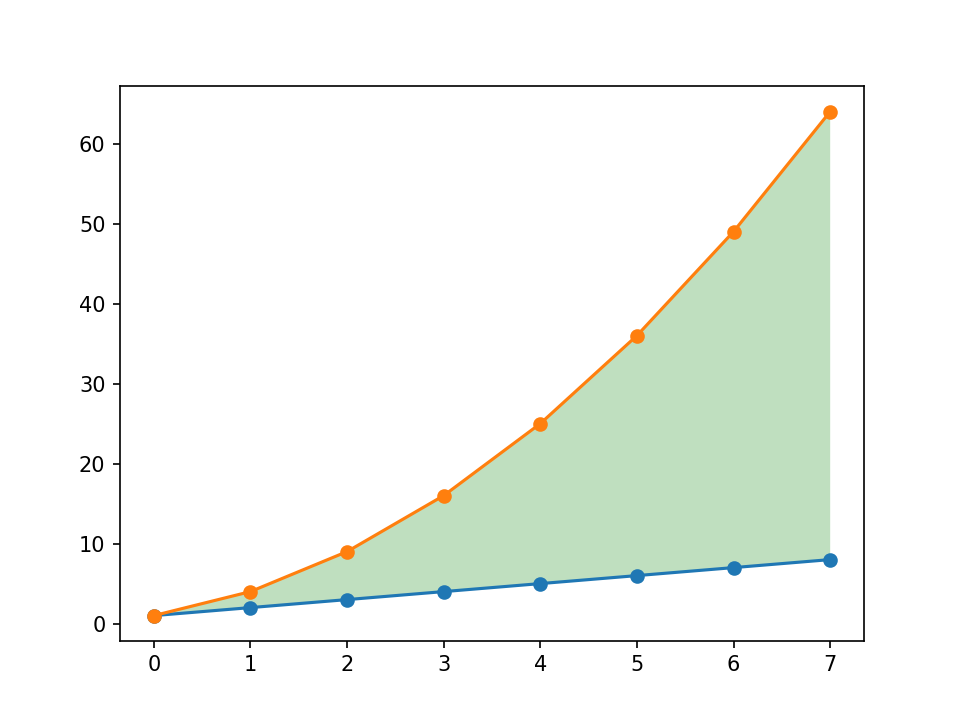

In [28]:
'''

So there are a couple of things which are new about this versus the scatter plots. First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots. 

Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly. 

'''
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

In [10]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [11]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [29]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, #lower and upper bounce
                       facecolor='green', 
                       alpha=0.25)  #transparency


Let's try working with dates!

<IPython.core.display.Javascript object>


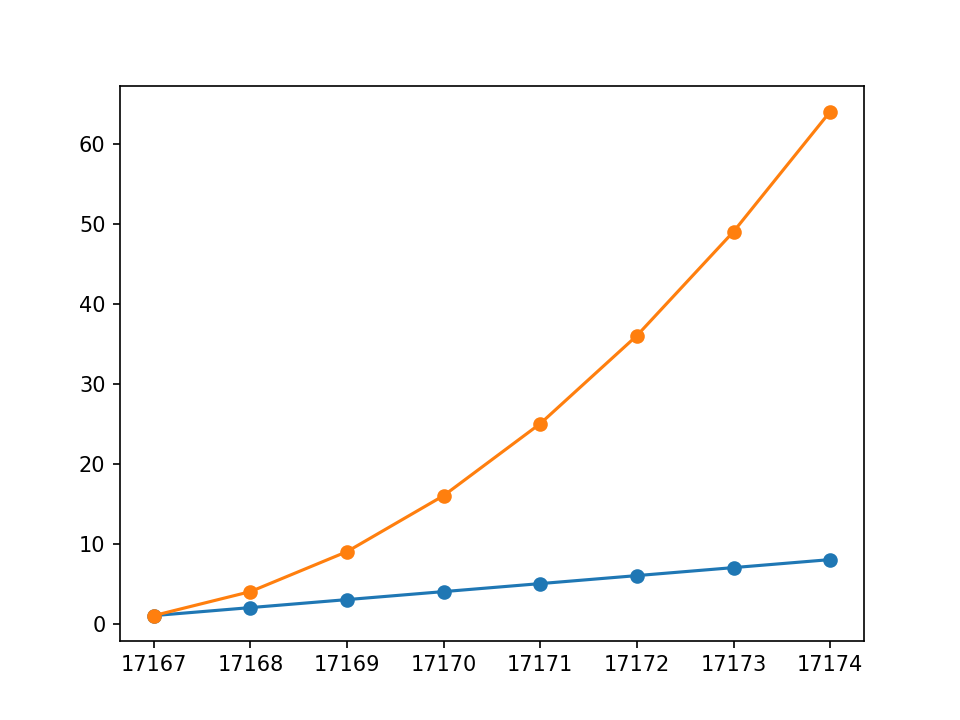

In [34]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>


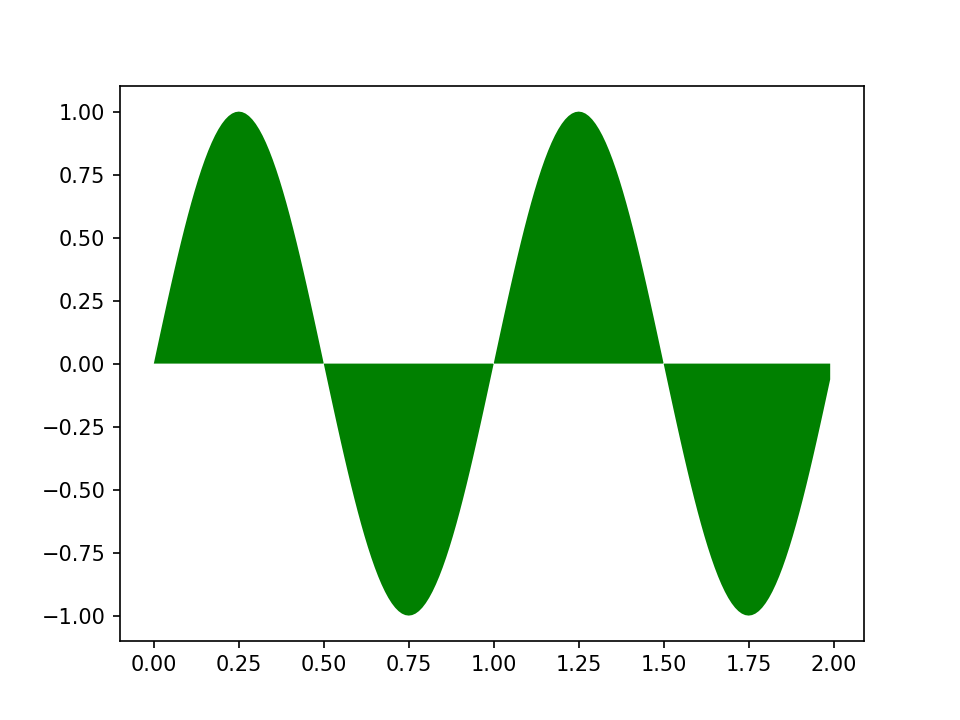

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)

y2 = 0.8 * np.sin(4 * np.pi * x)

#plt.fill_between(x, y1)
plt.fill_between(x, y1, 0, facecolor='green')
#plt.fill_between(x, y1, 1, facecolor='green')
#plt.fill_between(x, y1, y2)


Let's try using pandas

<IPython.core.display.Javascript object>


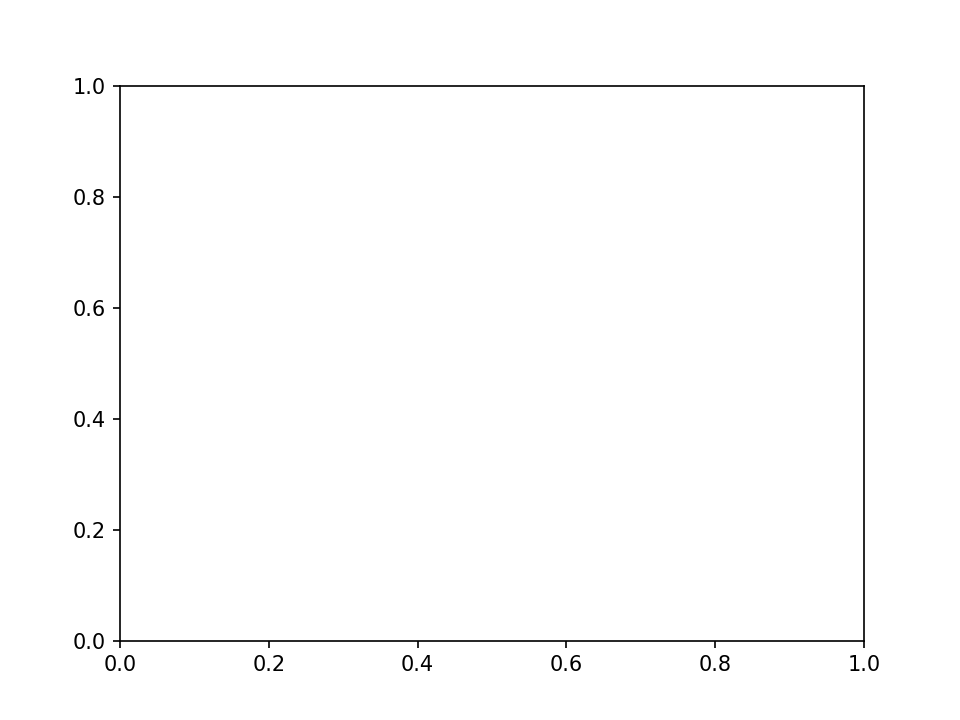

TypeError: object of type 'map' has no len()

In [35]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error, That resulted in error. It's a pretty confusing one at that. You see, the problem is the map function returns an iterator. Matplotlib can't handle the iterator, so we need to convert it to a list first.
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>


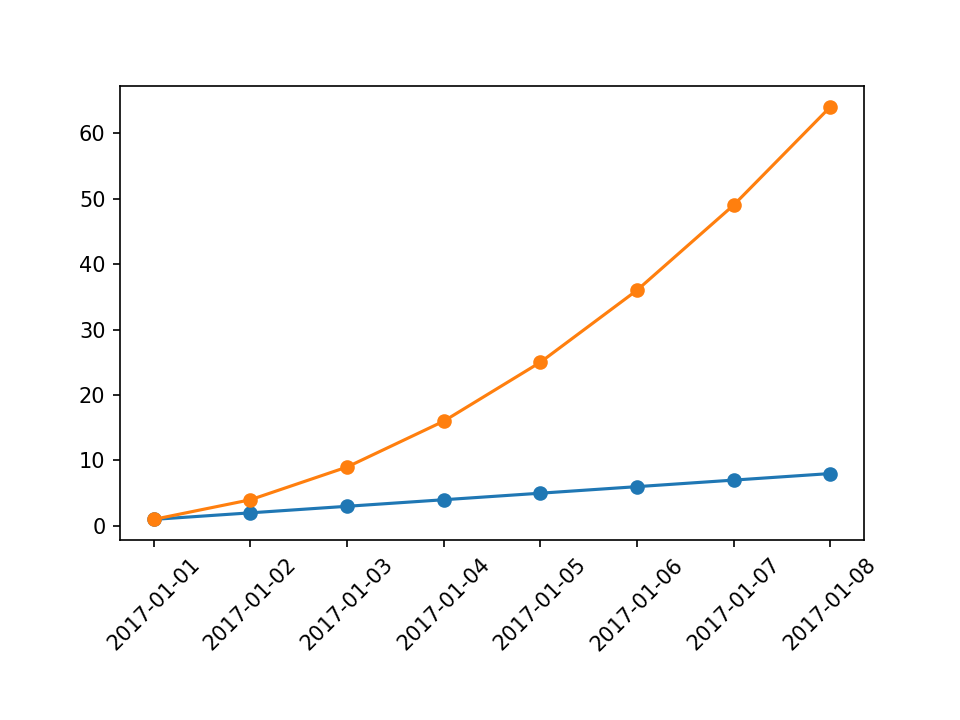

[Timestamp('2017-01-01 00:00:00'), Timestamp('2017-01-02 00:00:00'), Timestamp('2017-01-03 00:00:00'), Timestamp('2017-01-04 00:00:00'), Timestamp('2017-01-05 00:00:00'), Timestamp('2017-01-06 00:00:00'), Timestamp('2017-01-07 00:00:00'), Timestamp('2017-01-08 00:00:00')]


In [46]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')
print(observation_dates)

In [60]:
'''
What I want to show you though, is that you can access the text of the tics using the get tick labels function. 
Each of the tick labels are a text object which itself is an artist. This means that you can use a number of different artist functions. 
One specific to text is the set rotation function which changes the rotation based on degrees. Let's iterate through the axis labels and change that. 
The text is a bit hard to read because it just runs off the image. So you can adjust the subplot. 

'''

x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    print(item)


Text(736330,0,'2017-01-01')
Text(736331,0,'2017-01-02')
Text(736332,0,'2017-01-03')
Text(736333,0,'2017-01-04')
Text(736334,0,'2017-01-05')
Text(736335,0,'2017-01-06')
Text(736336,0,'2017-01-07')
Text(736337,0,'2017-01-08')


In [58]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)


In [39]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [40]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

<IPython.core.display.Javascript object>


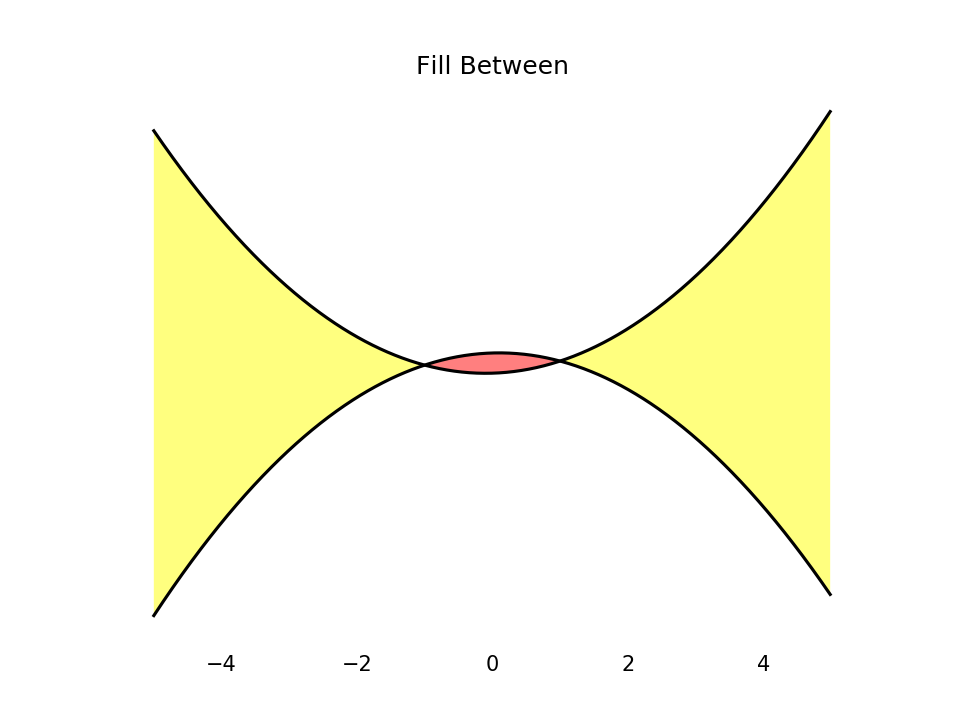

In [93]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 5, 0.01)
y1 = -5*x*x + x + 10
y2 = 5*x*x + x

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >y1, facecolor='yellow', alpha=0.5)
ax.fill_between(x, y1, y2, where=y2 <=y1, facecolor='red', alpha=0.5)
ax.set_title('Fill Between')

plt.show()

In [96]:
# Let's compare two graphs of a financial times with a simple line plot on the left and a filled line on the right.
#https://matplotlib.org/gallery/recipes/fill_between_alpha.html#sphx-glr-gallery-recipes-fill-between-alpha-py

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

# load up some sample financial data
with cbook.get_sample_data("C:/Users/hp/coursera/Applied Plotting, Charting & Data Representation in Python/Module 2 Basic Charting/goog.npz") as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)
# Matplotlib prefers datetime instead of np.datetime64.
date = r.date.astype('O')
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r.close.min()

ax1.plot(date, r.close, lw=2)
ax2.fill_between(date, pricemin, r.close, facecolor='blue', alpha=0.5)

for ax in ax1, ax2:
    ax.grid(True)

ax1.set_ylabel('price')
for label in ax2.get_yticklabels():
    label.set_visible(False)

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

FileNotFoundError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/C:/Users/hp/coursera/Applied Plotting, Charting & Data Representation in Python/Module 2 Basic Charting/goog.npz'

# Bar Charts

<IPython.core.display.Javascript object>


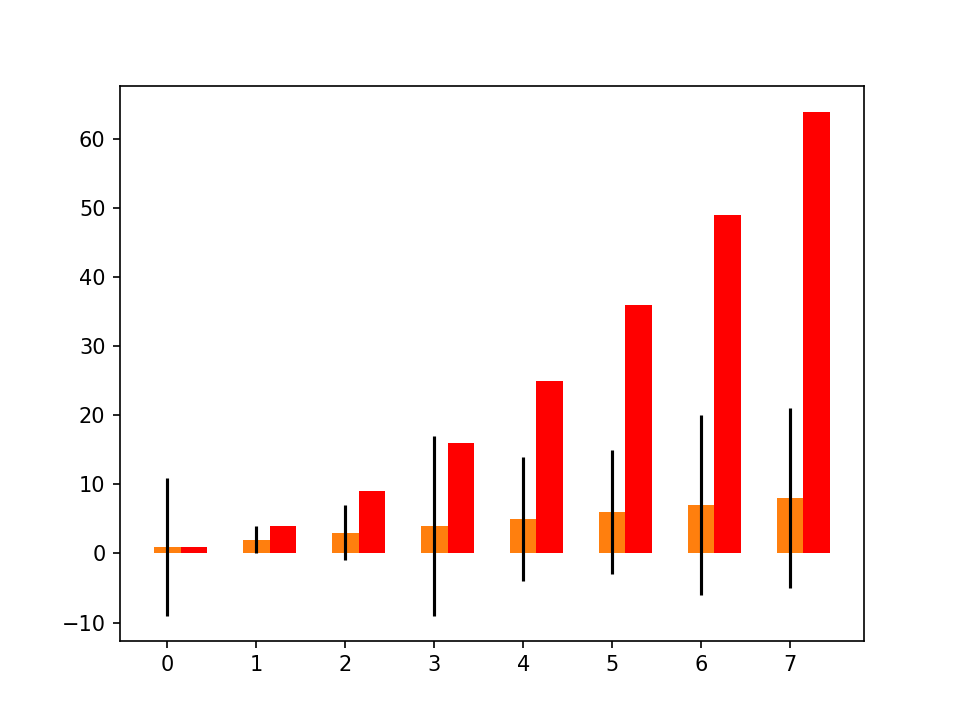

<Container object of 8 artists>

In [81]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [82]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)
    print(item,new_xvals)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

0 [0.3]
1 [0.3, 1.3]
2 [0.3, 1.3, 2.3]
3 [0.3, 1.3, 2.3, 3.3]
4 [0.3, 1.3, 2.3, 3.3, 4.3]
5 [0.3, 1.3, 2.3, 3.3, 4.3, 5.3]
6 [0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3]
7 [0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3]


<Container object of 8 artists>

In [83]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 
print(linear_err)
# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

[10, 2, 4, 13, 9, 9, 13, 13]


<Container object of 8 artists>

<IPython.core.display.Javascript object>


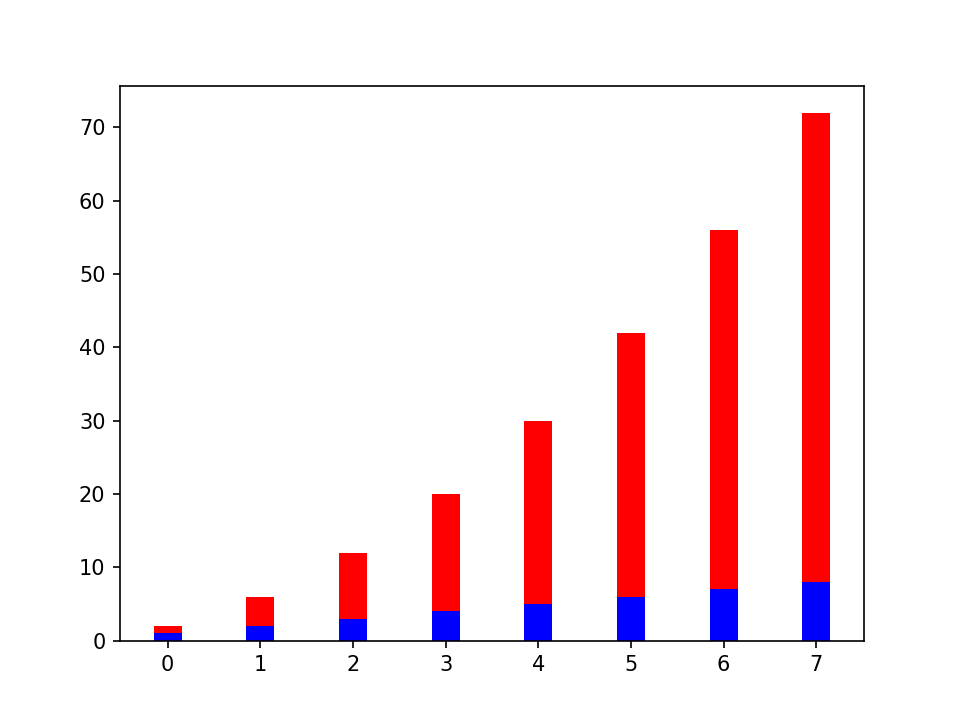

<Container object of 8 artists>

In [84]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


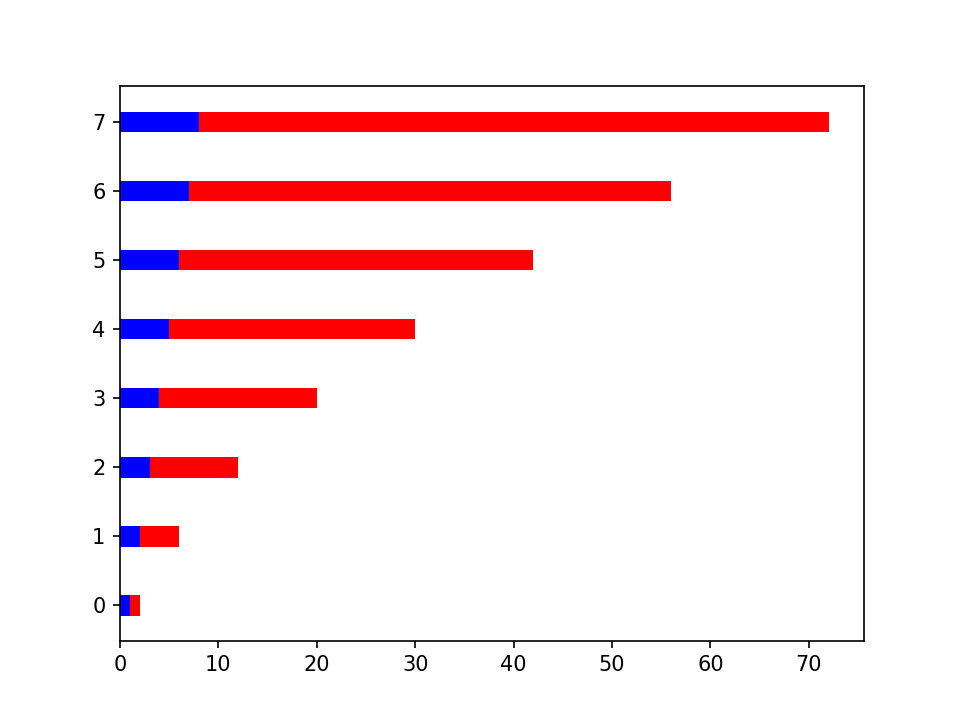

<Container object of 8 artists>

In [85]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

<IPython.core.display.Javascript object>


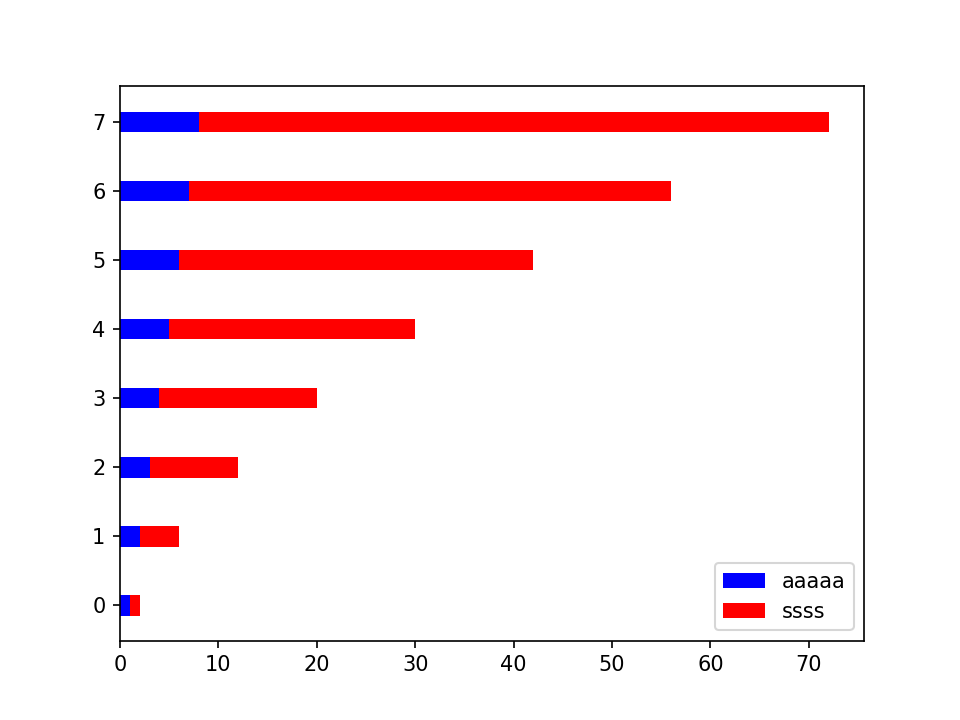

In [92]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b', label='aaaaa')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r', label='ssss')
plt.legend()


<IPython.core.display.Javascript object>


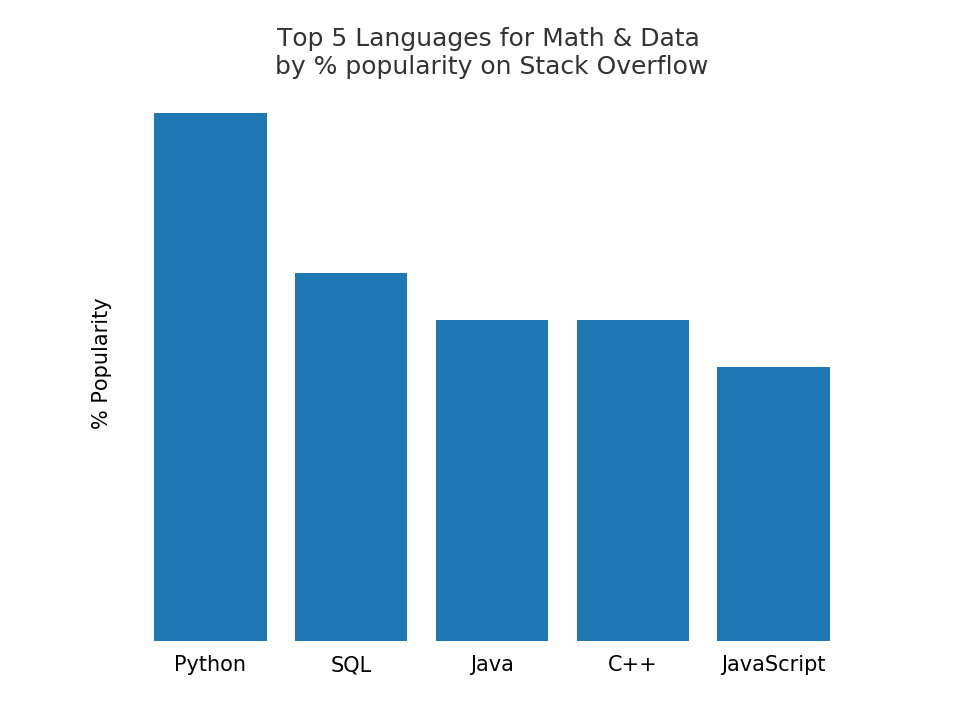

In [140]:
#Task: Remove all the ticks (both axes), and tick labels on the Y axis. 
#Task: remove the frame of the chart

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)



In [134]:
x = plt.gca().xaxis
y = plt.gca().yaxis

for itemx in x.get_ticklabels():
    print(itemx)

for itemy in y.get_ticklabels():
    print(itemy)



Text(0,0,'Python')
Text(1,0,'SQL')
Text(2,0,'Java')
Text(3,0,'C++')
Text(4,0,'JavaScript')
Text(0,0,'0')
Text(0,10,'10')
Text(0,20,'20')
Text(0,30,'30')
Text(0,40,'40')
Text(0,50,'50')
Text(0,0,'')


In [141]:
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

In [142]:

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    print(spine)
plt.show()

Spine
Spine
Spine
Spine


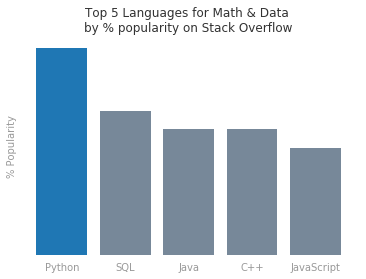

In [3]:
#Task: Remove all the ticks (both axes), and tick labels on the Y axis. and # remove the frame of the chart
#Task: Change the bar colors to be less bright blue, make one bar, the python bar, a contrasting color, soften all labels by turning grey.

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')

# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.4)
plt.ylabel('% Popularity', alpha=0.4)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()


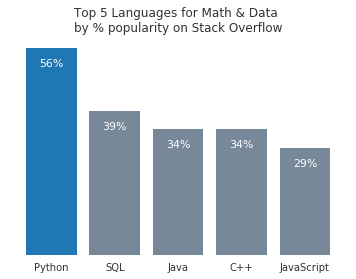

In [5]:
#Task: Directly label each bar with Y axis values, and remove the Y label since bars are directly labeled.


import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]


# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled


#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()